**# KNN**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [4]:
df=pd.read_csv("Classified Data.txt",index_col=0)

In [5]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [7]:
X = df.drop('TARGET CLASS', axis=1)  # Features
y = df['TARGET CLASS']  # Target variable

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
"""
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
"""
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# List to store error rates for different values of k
error_rates = []

# Loop through different k values (from 1 to 40 in this example)
for k in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error_rate)


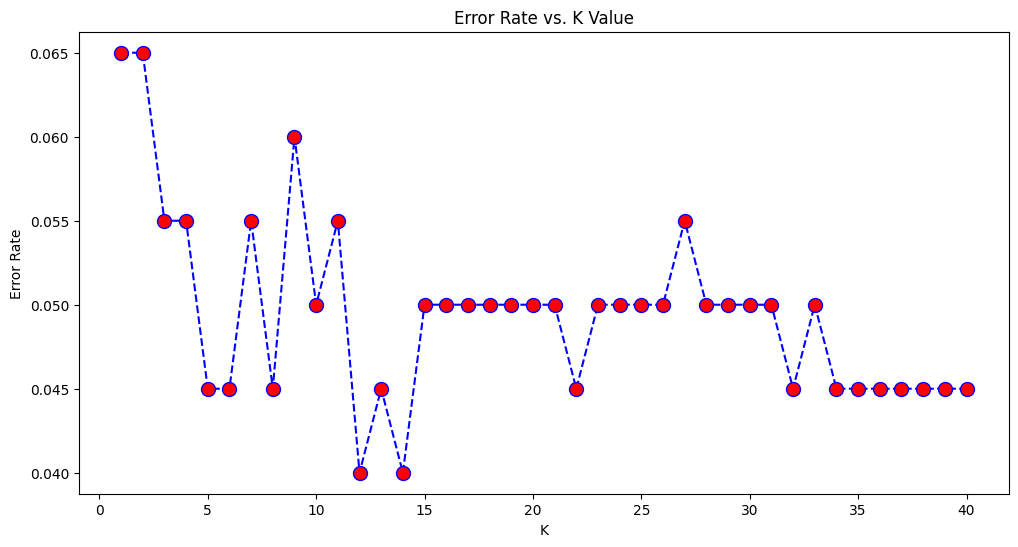

In [11]:
# Plotting the error rates
plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), error_rates, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [13]:
# Determine the best k (the one with the minimum error rate)
best_k = error_rates.index(min(error_rates)) + 1
print(f"The best value for k is {best_k} with an error rate of {min(error_rates):.4f}")

The best value for k is 12 with an error rate of 0.0400


In [14]:
# Train and visualize the model using the best k
knn_best = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)


In [15]:
# Visualize confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

Accuracy: 0.955
Confusion Matrix:
 [[95  3]
 [ 5 97]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        98
           1       0.97      0.95      0.96       102

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [ ]:
################

**# K-means**

In [17]:
from sklearn.cluster import KMeans

In [19]:
df=pd.read_csv("income.csv")

In [20]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


**# Before Noramlization**

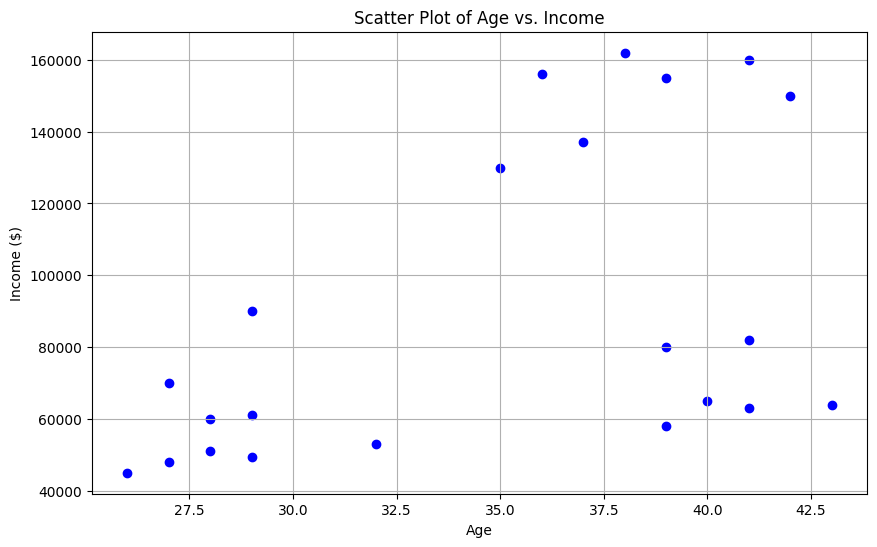

In [22]:
# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Income($)'], color='blue')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.title('Scatter Plot of Age vs. Income')

# Show plot
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


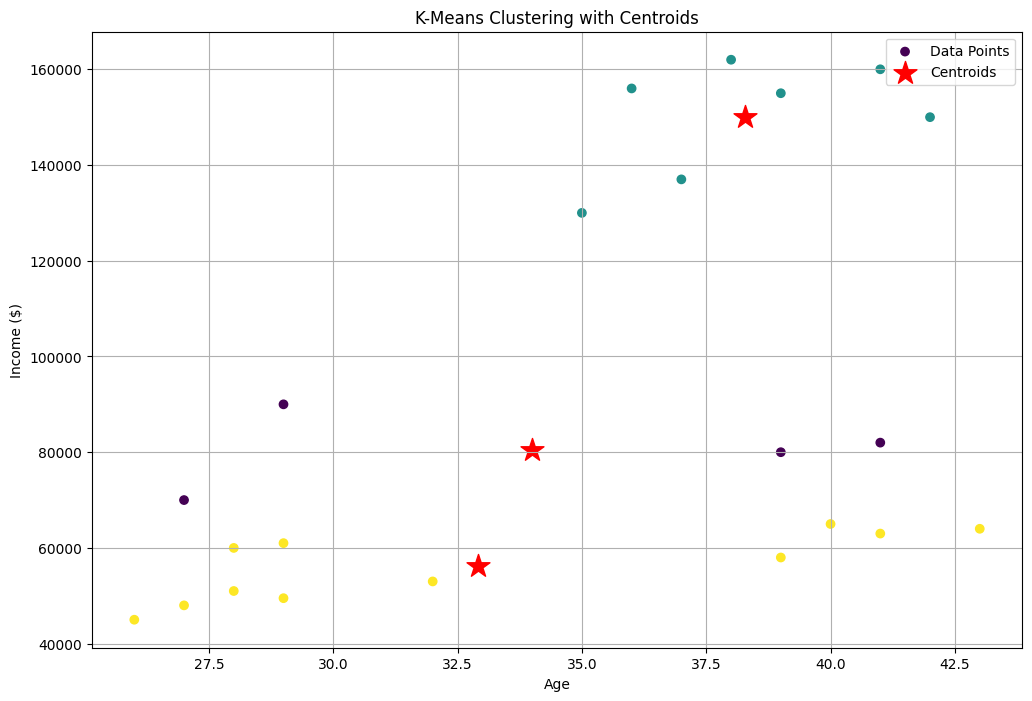

In [28]:
km = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = km.fit_predict(df[['Age', 'Income($)']])

# Retrieve centroids
centroids = km.cluster_centers_

# Plotting the data points and centroids
plt.figure(figsize=(12, 8))

# Scatter plot of data points
plt.scatter(df['Age'], df['Income($)'], c=df['Cluster'], cmap='viridis', label='Data Points')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='*', label='Centroids')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.title('K-Means Clustering with Centroids')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [29]:
df['Cluster']

,Cluster
0,0
1,0
2,2
3,2
4,1
5,1
6,1
7,1
8,1
9,1


In [31]:
df['Cluster'].value_counts()

,count
Cluster,
2,11
1,7
0,4


# **Normalize data**

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Income($)']] = scaler.fit_transform(df[['Age', 'Income($)']])


# After Normalization

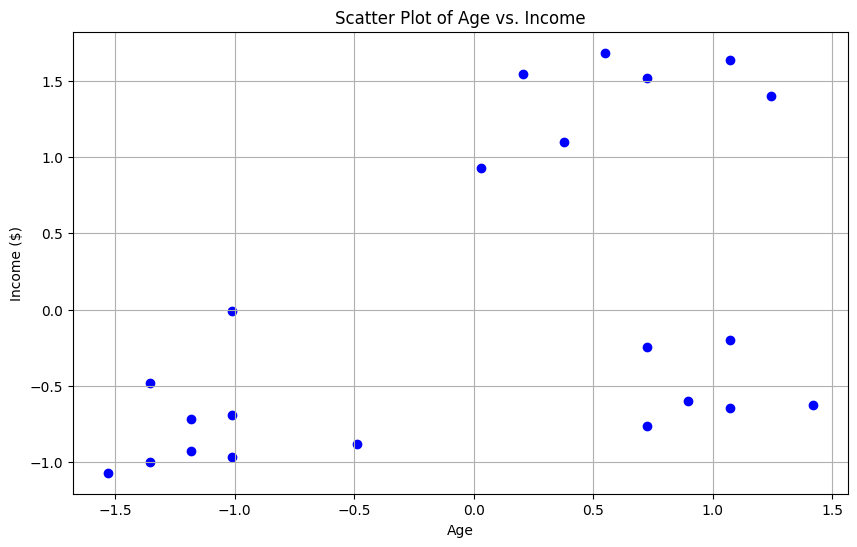

In [35]:
# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Income($)'], color='blue')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.title('Scatter Plot of Age vs. Income')

# Show plot
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


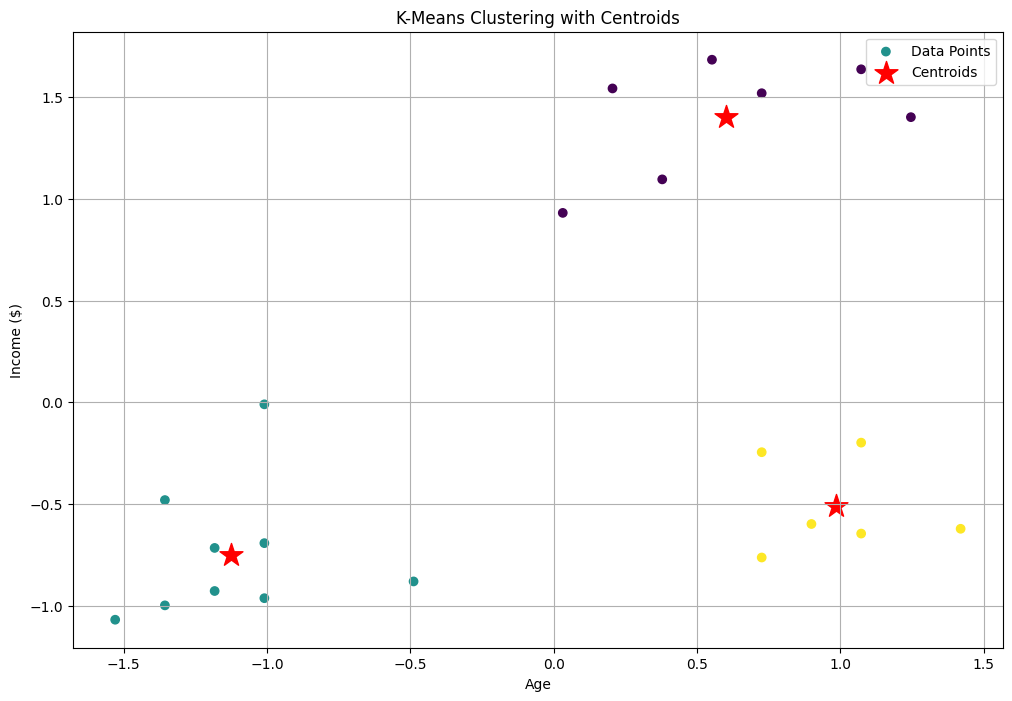

In [34]:
km = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = km.fit_predict(df[['Age', 'Income($)']])

# Retrieve centroids
centroids = km.cluster_centers_

# Plotting the data points and centroids
plt.figure(figsize=(12, 8))

# Scatter plot of data points
plt.scatter(df['Age'], df['Income($)'], c=df['Cluster'], cmap='viridis', label='Data Points')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='*', label='Centroids')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.title('K-Means Clustering with Centroids')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [36]:
df['Cluster'].value_counts()

,count
Cluster,
1,9
0,7
2,6
